# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the Dataset

In [2]:
df=pd.read_csv("energy_dataset.csv")
df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
time                                           35064 non-null object
generation biomass                             35045 non-null float64
generation fossil brown coal/lignite           35046 non-null float64
generation fossil coal-derived gas             35046 non-null float64
generation fossil gas                          35046 non-null float64
generation fossil hard coal                    35046 non-null float64
generation fossil oil                          35045 non-null float64
generation fossil oil shale                    35046 non-null float64
generation fossil peat                         35046 non-null float64
generation geothermal                          35046 non-null float64
generation hydro pumped storage aggregated     0 non-null float64
generation hydro pumped storage consumption    35045 non-null float64
generation hydro run-of-river and poundage     35045 non

In [4]:
df.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,35045.000000,35046.0,35046.0,35046.0,0.0,...,35045.000000,35046.0,35046.000000,35064.000000,0.0,35064.000000,35064.000000,35028.000000,35064.000000,35064.000000
mean,383.513540,448.059208,0.0,5622.737488,4256.065742,298.319789,0.0,0.0,0.0,NaN,...,269.452133,0.0,5464.479769,1439.066735,NaN,5471.216689,28712.129962,28696.939905,49.874341,57.884023
std,85.353943,354.568590,0.0,2201.830478,1961.601013,52.520673,0.0,0.0,0.0,NaN,...,50.195536,0.0,3213.691587,1677.703355,NaN,3176.312853,4594.100854,4574.987950,14.618900,14.204083
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,...,0.000000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,...,240.000000,0.0,2933.000000,69.000000,NaN,2979.000000,24793.750000,24807.750000,41.490000,49.347500
50%,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,...,279.000000,0.0,4849.000000,576.000000,NaN,4855.000000,28906.000000,28901.000000,50.520000,58.020000
75%,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,...,310.000000,0.0,7398.000000,2636.000000,NaN,7353.000000,32263.250000,32192.000000,60.530000,68.010000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,...,357.000000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000


# Missing Values

In [5]:
df.isnull().sum()

time                                               0
generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                              

In [6]:
df=df.drop(['generation fossil coal-derived gas','generation fossil oil shale','generation fossil peat', 'generation geothermal', 'generation hydro pumped storage aggregated', 'generation marine', 'generation wind offshore', 'forecast wind offshore eday ahead'], axis=1)                                                              

In [7]:
df=df.fillna(method='ffill')
df.shape

(35064, 21)

# Exploratory Data Analysis

In [8]:
df.corr()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
generation biomass,1.000000,0.230034,-0.021522,0.433733,0.459588,-0.045055,-0.284648,-0.033352,-0.021065,0.658392,-0.560600,-0.004746,-0.346073,-0.068688,-0.008757,-0.072391,0.085633,0.083438,0.109236,0.142688
generation fossil brown coal/lignite,0.230034,1.000000,0.499899,0.768819,0.314885,-0.324024,-0.524707,-0.228906,-0.007578,0.097981,0.104386,0.040033,0.282888,-0.434212,0.041850,-0.436119,0.279087,0.280729,0.568156,0.363986
generation fossil gas,-0.021522,0.499899,1.000000,0.541687,0.309545,-0.420747,-0.271495,0.060344,-0.112268,-0.065987,0.334827,0.074464,0.275167,-0.397335,0.079865,-0.397337,0.543760,0.548990,0.640891,0.461423
generation fossil hard coal,0.433733,0.768819,0.541687,1.000000,0.440851,-0.406298,-0.497573,-0.157093,-0.023168,0.264624,-0.019593,0.045870,0.170264,-0.441781,0.047012,-0.444420,0.394870,0.396947,0.671779,0.465648
generation fossil oil,0.459588,0.314885,0.309545,0.440851,1.000000,-0.330967,-0.106458,0.160700,0.015430,0.374773,-0.115386,0.100213,-0.176109,-0.051755,0.096491,-0.058223,0.498497,0.496173,0.292831,0.285021
generation hydro pumped storage consumption,-0.045055,-0.324024,-0.420747,-0.406298,-0.330967,1.000000,0.053197,-0.234451,0.012494,0.021258,-0.267355,-0.214355,-0.188288,0.389139,-0.221756,0.390539,-0.559814,-0.562769,-0.600553,-0.426211
generation hydro run-of-river and poundage,-0.284648,-0.524707,-0.271495,-0.497573,-0.106458,0.053197,1.000000,0.652724,-0.124114,-0.127353,0.053214,0.039655,-0.286303,0.223203,0.045172,0.226447,0.120586,0.118340,-0.294518,-0.136657
generation hydro water reservoir,-0.033352,-0.228906,0.060344,-0.157093,0.160700,-0.234451,0.652724,1.000000,-0.049216,0.065300,-0.065920,0.091686,-0.288154,-0.019419,0.102927,-0.011726,0.476691,0.479253,-0.017423,0.071830
generation nuclear,-0.021065,-0.007578,-0.112268,-0.023168,0.015430,0.012494,-0.124114,-0.049216,1.000000,0.041723,-0.062053,0.003860,0.087578,0.048472,-0.001003,0.044919,0.090866,0.085803,-0.043348,-0.052981
generation other,0.658392,0.097981,-0.065987,0.264624,0.374773,0.021258,-0.127353,0.065300,0.041723,1.000000,-0.443450,-0.016822,-0.359655,0.047374,-0.019434,0.044602,0.101702,0.100768,0.043971,0.099875


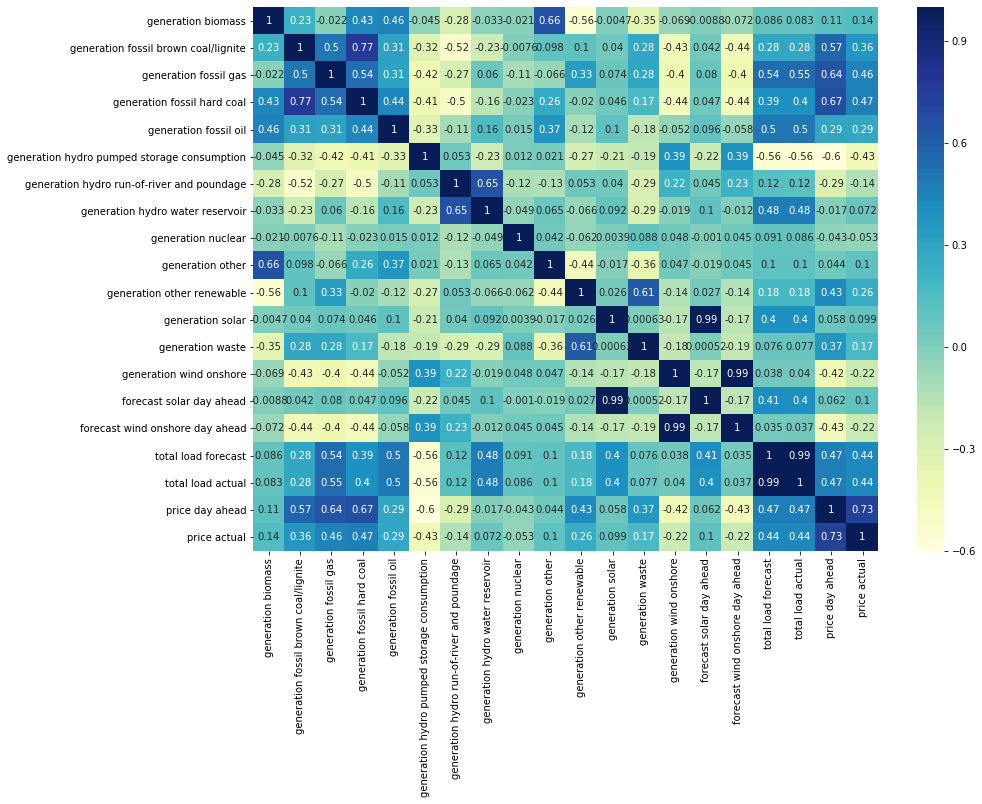

In [9]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

In [10]:
df=df.drop(['forecast solar day ahead', 'forecast wind onshore day ahead', 'total load forecast', 'price day ahead'], axis=1)

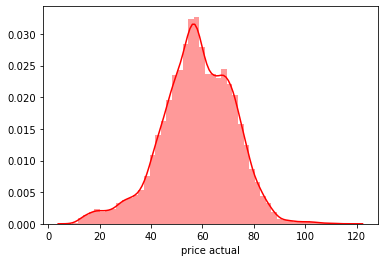

In [11]:
sns.distplot(df['price actual'], color="r")

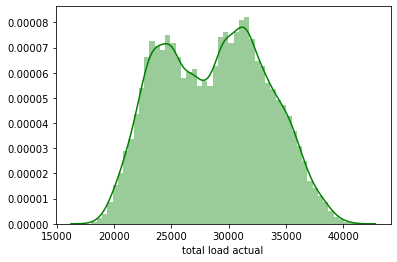

In [12]:
sns.distplot(df['total load actual'], color='g')

# Feature Engineering from Date

In [13]:
df['time'] = pd.to_datetime(df['time'])
df['time']

0        2015-01-01 00:00:00+01:00
1        2015-01-01 01:00:00+01:00
2        2015-01-01 02:00:00+01:00
3        2015-01-01 03:00:00+01:00
4        2015-01-01 04:00:00+01:00
                   ...            
35059    2018-12-31 19:00:00+01:00
35060    2018-12-31 20:00:00+01:00
35061    2018-12-31 21:00:00+01:00
35062    2018-12-31 22:00:00+01:00
35063    2018-12-31 23:00:00+01:00
Name: time, Length: 35064, dtype: object

In [14]:
df['day'] = df['time'].apply(lambda time:time.day)
df['month'] = df['time'].apply(lambda time:time.month)
df['year'] = df['time'].apply(lambda time:time.year)
df['hour'] = df['time'].apply(lambda time:time.hour)

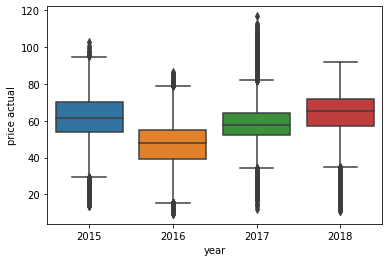

In [15]:
sns.boxplot(x='year',y='price actual',data=df)

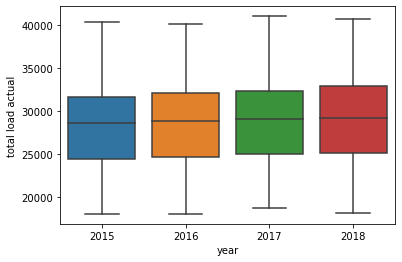

In [16]:
sns.boxplot(x='year',y='total load actual',data=df)

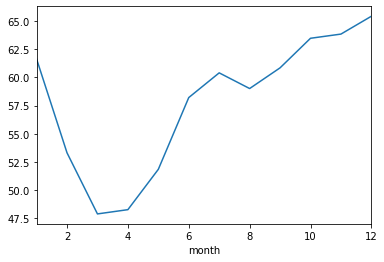

In [17]:
df.groupby('month').mean()['price actual'].plot()

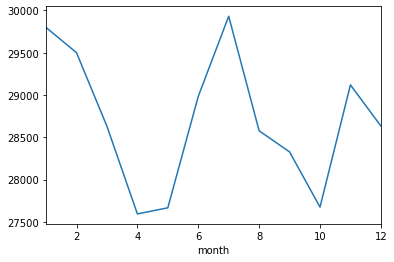

In [18]:
df.groupby('month').mean()['total load actual'].plot()

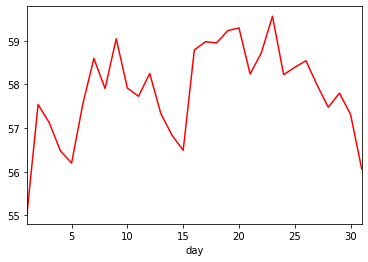

In [19]:
df.groupby('day').mean()['price actual'].plot(color='r')

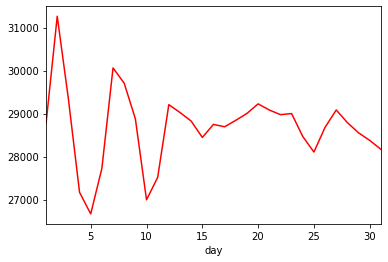

In [20]:
df.groupby('day').mean()['total load actual'].plot(color='r')

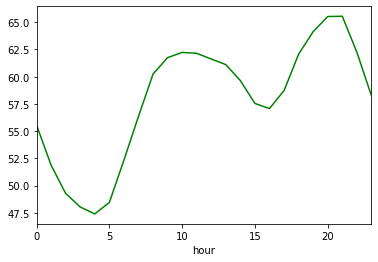

In [21]:
df.groupby('hour').mean()['price actual'].plot(color='g')

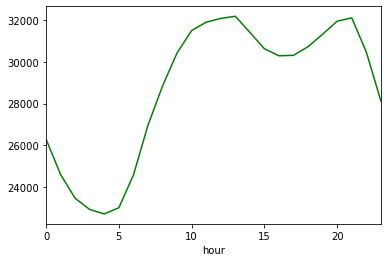

In [22]:
df.groupby('hour').mean()['total load actual'].plot(color='g')

In [23]:
df = df.drop('time',axis=1)

In [24]:
df.columns

Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore', 'total load actual',
       'price actual', 'day', 'month', 'year', 'hour'],
      dtype='object')

In [25]:
df['date_hour']=df.apply(lambda x:'%s-%s-%s-%s' %(int(x['year']), int(x['month']), int(x['day']), int(x['hour'])),axis=1)

In [26]:
df=df.drop(['day', 'month', 'year', 'hour'], axis=1)
df.index = df['date_hour']
df.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price actual,date_hour
date_hour,,,,,,,,,,,,,,,,,
2015-1-1-0,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,25385.0,65.41,2015-1-1-0
2015-1-1-1,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0,64.92,2015-1-1-1
2015-1-1-2,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0,64.48,2015-1-1-2
2015-1-1-3,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,21286.0,59.32,2015-1-1-3
2015-1-1-4,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,20264.0,56.04,2015-1-1-4


In [27]:
df.shape

(35064, 17)

# Model Building and Evaluation (Total Energy Demand)

# Train Test Split

In [28]:
df_load=df.iloc[:, 14:15]
dataset_load=df_load.values

train_load = df_load[0:24545]
test_load = df_load[24545:]

df_train_load = train_load.values
df_test_load = test_load.values

# Scaling

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))
scaled_train_load= scaler.fit_transform(df_train_load)

In [30]:
X_train_load = []
y_train_load = []
for i in range(60,len(train_load)):
        X_train_load.append(scaled_train_load[i-60:i,0])
        y_train_load.append(scaled_train_load[i,0])
X_train_load, y_train_load = np.array(X_train_load), np.array(y_train_load)

X_train_load = np.reshape(X_train_load, (X_train_load.shape[0],X_train_load.shape[1],1))

# Build the Model

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

model = Sequential()

model.add(LSTM(units=60,activation='relu', return_sequences = True, input_shape = (X_train_load.shape[1], 1)))
model.add(Dropout(0.5))

model.add(LSTM(units= 30,activation='relu', return_sequences = True))
model.add(Dropout(0.5))

model.add(LSTM(units= 10))
model.add(Dropout(0.5))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

model.fit(x=X_train_load,y=y_train_load, batch_size=128, epochs=10)

Train on 24485 samples
Epoch 1/10
24485/24485 [==============================] - 81s 3ms/sample - loss: 0.0630
Epoch 2/10
24485/24485 [==============================] - 69s 3ms/sample - loss: 0.0373
Epoch 3/10
24485/24485 [==============================] - 70s 3ms/sample - loss: 0.0220
Epoch 4/10
24485/24485 [==============================] - 71s 3ms/sample - loss: 0.0166
Epoch 5/10
24485/24485 [==============================] - 71s 3ms/sample - loss: 0.0137
Epoch 6/10
24485/24485 [==============================] - 71s 3ms/sample - loss: 0.0118
Epoch 7/10
24485/24485 [==============================] - 71s 3ms/sample - loss: 0.0110
Epoch 8/10
24485/24485 [==============================] - 71s 3ms/sample - loss: 0.0104
Epoch 9/10
24485/24485 [==============================] - 72s 3ms/sample - loss: 0.0096
Epoch 10/10
24485/24485 [==============================] - 72s 3ms/sample - loss: 0.0096


# Evaluation

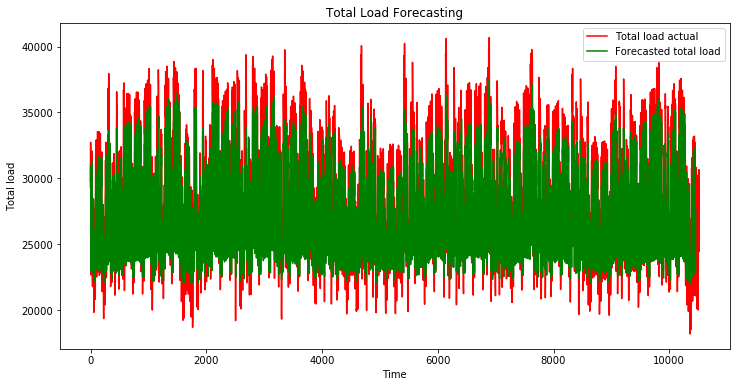

In [32]:
data_load = df_load[len(df_load) - len(test_load) - 60:].values
data_load = data_load.reshape(-1,1)
data_load = scaler.transform(data_load)

X_test_load = []
for i in range(60, len(test_load)):
    X_test_load.append(data_load[i-60:i, 0])
X_test_load = np.array(X_test_load)

X_test_load = np.reshape(X_test_load, (X_test_load.shape[0], X_test_load.shape[1], 1))

predicted_load = model.predict(X_test_load)
predicted_load = scaler.inverse_transform(predicted_load)

plt.figure(figsize=(12,6))
plt.plot(df_test_load, color='red', label='Total load actual')
plt.plot(predicted_load, color='green', label='Forecasted total load')
plt.xlabel('Time')
plt.ylabel('Total load')
plt.title('Total Load Forecasting')
plt.legend()
plt.show()

# Model Building and Evaluation (Price)

# Train Test Split

In [33]:
df_price=df.iloc[:, 15:16]
train_price = df_price[0:24545]
test_price = df_price[24545:]

df_train_price = train_price.values
df_test_price = test_price.values

# Scaling

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))
scaled_train_price= scaler.fit_transform(df_train_price)

In [35]:
X_train_price = []
y_train_price = []
for i in range(60,len(train_price)):
        X_train_price.append(scaled_train_price[i-60:i,0])
        y_train_price.append(scaled_train_price[i,0])
X_train_price, y_train_price = np.array(X_train_price), np.array(y_train_price)

X_train_price = np.reshape(X_train_price, (X_train_price.shape[0],X_train_price.shape[1],1))

# Build the Model

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

model = Sequential()

model.add(LSTM(units=60,activation='relu', return_sequences = True, input_shape = (X_train_price.shape[1], 1)))
model.add(Dropout(0.5))

model.add(LSTM(units= 30,activation='relu', return_sequences = True))
model.add(Dropout(0.5))

model.add(LSTM(units= 10))
model.add(Dropout(0.5))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

model.fit(x=X_train_load,y=y_train_load, batch_size=128, epochs=10)

Train on 24485 samples
Epoch 1/10
24485/24485 [==============================] - 86s 4ms/sample - loss: 0.0668
Epoch 2/10
24485/24485 [==============================] - 71s 3ms/sample - loss: 0.0457
Epoch 3/10
24485/24485 [==============================] - 72s 3ms/sample - loss: 0.0276
Epoch 4/10
24485/24485 [==============================] - 72s 3ms/sample - loss: 0.0175
Epoch 5/10
24485/24485 [==============================] - 73s 3ms/sample - loss: 0.0136
Epoch 6/10
24485/24485 [==============================] - 73s 3ms/sample - loss: 0.0113
Epoch 7/10
24485/24485 [==============================] - 72s 3ms/sample - loss: 0.0104
Epoch 8/10
24485/24485 [==============================] - 73s 3ms/sample - loss: 0.0097
Epoch 9/10
24485/24485 [==============================] - 74s 3ms/sample - loss: 0.0092
Epoch 10/10
24485/24485 [==============================] - 73s 3ms/sample - loss: 0.0087


# Evaluation

In [37]:
data_price = df_price[len(df_price) - len(test_price) - 60:].values
data_price = data_price.reshape(-1,1)
data_price = scaler.transform(data_price)

In [38]:
X_test_price = []
for i in range(60, len(test_price)):
    X_test_price.append(data_price[i-60:i, 0])
X_test_price = np.array(X_test_price)

X_test_price = np.reshape(X_test_price, (X_test_price.shape[0], X_test_price.shape[1], 1))

In [39]:
predicted_price = model.predict(X_test_price)
predicted_price = scaler.inverse_transform(predicted_price)

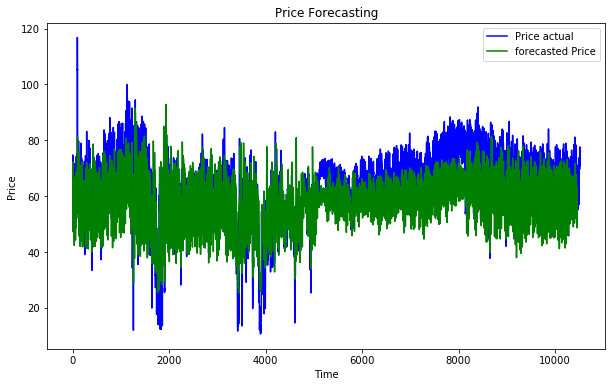

In [43]:
plt.figure(figsize=(10,6))
plt.plot(df_test_price, color='blue', label='Price actual')
plt.plot(predicted_price, color='green', label='forecasted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Price Forecasting')
plt.legend()
plt.show()